In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# import housing_price sheet
house_prices = pd.read_csv('/Users/joaquingomez/Downloads/ML_Project/Ames_HousePrice.csv')

In [6]:
house_prices.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [7]:
house_prices[house_prices.columns.isnull().any()]

KeyError: False

In [8]:
house_prices[house_prices.columns[house_prices.isnull().any()]].isnull().sum()

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [9]:
house_prices.shape

(2580, 82)

In [10]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

20     171
60     128
120     33
80      30
50      24
90      17
85      15
160     13
30      12
70      10
190      4
75       2
180      1
150      1
40       1
Name: MSSubClass, dtype: int64

In [11]:
house_prices[house_prices['YearRemodAdd'] == house_prices['YearBuilt']]
# houses that have not been remodeled

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
5,6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
6,7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,752,534479150,1036,112900,20,RL,63.0,7584,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal
2570,754,905102170,1040,129500,20,RL,70.0,11200,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2571,755,532376170,890,115000,190,RL,65.0,8450,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [12]:
house_prices['YearRemodAdd'] - house_prices['YearBuilt']
# can create a column showing how many years between building and remodel

0        11
1         0
2        77
3       103
4         0
       ... 
2575     34
2576      0
2577      1
2578      0
2579      1
Length: 2580, dtype: int64

In [13]:
house_prices['YrSold'] - house_prices['YearRemodAdd']
# column showing years between last remodel and the year that it was sold (how new the construction is)

0       60
1       25
2        0
3        6
4        8
        ..
2575    59
2576    54
2577    57
2578     7
2579    12
Length: 2580, dtype: int64

In [14]:
house_prices['BsmtExposure'].value_counts()

No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64

In [15]:
imputation_dict = house_prices.groupby(['MSSubClass', 'Neighborhood'])[['LotFrontage']].mean().to_dict()
# groupby subclass, neighborhood, interpolate average lot frontage

In [16]:
missingRowIndexes = house_prices.LotFrontage.isnull()
# impute the value by using the above imputation_dict
house_prices.loc[missingRowIndexes,'LotFrontage'] = house_prices[missingRowIndexes].apply(\
    lambda row: imputation_dict['LotFrontage'][(row['MSSubClass'], row['Neighborhood'])], axis = 1)

In [17]:
house_prices[house_prices['LotFrontage'].isnull()]["Neighborhood"]

109     GrnHill
275     Veenker
369     Mitchel
471      NWAmes
653     ClearCr
683     GrnHill
1068    ClearCr
1204    Landmrk
1401     NWAmes
1482    BrkSide
1485    Veenker
1634     Timber
1641     NWAmes
1920     NWAmes
1943     NWAmes
1960    ClearCr
2116    BrkSide
2222     NWAmes
2294    ClearCr
2327    Veenker
2361    ClearCr
Name: Neighborhood, dtype: object

In [18]:
house_prices['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [19]:
house_prices["MSSubClass"].value_counts()

20     939
60     502
50     259
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64

In [20]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

85     4
190    3
60     3
120    3
50     2
75     2
150    1
40     1
70     1
160    1
Name: MSSubClass, dtype: int64

FireplaceQu    48.100775
Fence          79.651163
Alley          93.488372
MiscFeature    96.240310
PoolQC         99.651163
dtype: float64


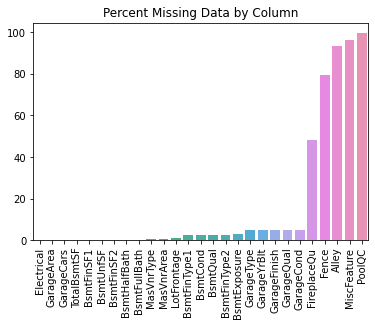

In [21]:
def percent_null(housing):
    percentmis = 100* housing.isnull().sum() / len(housing)
    return percentmis
percentmis=percent_null(house_prices)


percentmis = percentmis[percentmis>0].sort_values()
sns.barplot(x= percentmis.index, y=percentmis).set(title='Percent Missing Data by Column')
plt.xticks(rotation=90)
print(percentmis[percentmis>=20])

In [22]:
house_prices[(house_prices["MSSubClass"] == 85) & (house_prices["Neighborhood"] == "NWAmes")]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1401,402,527358090,1083,172000,85,RL,NaN,9927,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1641,642,527328010,1102,169000,85,RL,NaN,10464,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1920,104,534127140,1082,162500,85,RL,NaN,8723,Pave,NaN,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
1943,127,534251030,1320,172500,85,RL,NaN,16500,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [23]:
house_prices.dtypes

Unnamed: 0        int64
PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 82, dtype: object

In [24]:
house_prices = house_prices[house_prices['LotFrontage'].isnull() == False]
# remove null lot frontage where couldn't interpolate(21 rows)

In [25]:
house_prices['Remodeled'] = (house_prices['YearRemodAdd'] - house_prices['YearBuilt']) > 0
house_prices['Remodeled'] = house_prices['Remodeled'].astype(int)
house_prices.head()
# boolean if house has been remodeled or not

<ipython-input-25-1675e98616d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Remodeled'] = (house_prices['YearRemodAdd'] - house_prices['YearBuilt']) > 0
<ipython-input-25-1675e98616d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Remodeled'] = house_prices['Remodeled'].astype(int)


,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodeled
0,1,909176150,856,126000,30,RL,57.8,7890,Pave,NaN,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,1
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,0


In [26]:
house_prices['BsmtfinSF']= house_prices.TotalBsmtSF - house_prices.BsmtUnfSF
house_prices['BsmtfinSF']

<ipython-input-26-d1154a98d8ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['BsmtfinSF']= house_prices.TotalBsmtSF - house_prices.BsmtUnfSF


0       238.0
1       945.0
2       737.0
3         0.0
4       643.0
        ...  
2575      0.0
2576      0.0
2577    284.0
2578    841.0
2579    380.0
Name: BsmtfinSF, Length: 2559, dtype: float64

In [27]:
house_prices['Fireplaces'] = house_prices['Fireplaces'] > 0

<ipython-input-27-9900bf13f33c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Fireplaces'] = house_prices['Fireplaces'] > 0


In [28]:
house_prices['Fireplaces'] = house_prices['Fireplaces'].astype(int)

<ipython-input-28-f40b7855796d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices['Fireplaces'] = house_prices['Fireplaces'].astype(int)


In [29]:
house_prices['Fireplaces'].value_counts()
# changed fireplaces to present/not

1    1324
0    1235
Name: Fireplaces, dtype: int64

In [30]:
house_prices.shape

(2559, 84)

In [31]:
# columns to drop
drop_list = ['MiscVal', 'PoolArea', 'LowQualFinSF', 'Heating', 'RoofMatl', 'GarageYrBlt', 'FireplaceQu', 'TotalBsmtSF', 'Utilities', 'PoolQC', 'Alley', 'MiscFeature', 'GarageFinish', 'GarageArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2']

In [32]:
# dropping columns
house_prices = house_prices.drop(drop_list, axis=1)
house_prices.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'Remodeled', 'BsmtfinSF'],
      dtype='

In [33]:
house_prices["Fence"] = (house_prices["Fence"].isnull() == False).astype(int)
# convert fence into boolean 1/0

In [34]:
house_prices.loc[house_prices["Fence"] == True]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Remodeled,BsmtfinSF
11,12,923426070,1274,136000,60,RL,63.0,10475,Pave,Reg,...,0,0,0,1,3,2010,WD,Normal,0,458.0
42,43,535425060,1312,186000,20,RL,76.0,11355,Pave,IR1,...,144,0,0,1,4,2008,WD,Normal,1,637.0
48,49,902106130,936,109500,30,RM,56.0,4485,Pave,Reg,...,135,0,0,1,5,2010,WD,Normal,1,579.0
49,50,902102080,1230,110000,50,RM,60.0,10440,Pave,Reg,...,128,0,0,1,5,2009,WD,Normal,1,0.0
55,56,532479020,1641,140000,50,RL,70.0,10759,Pave,Reg,...,92,0,0,1,7,2008,WD,Normal,0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,743,535179020,1580,159500,20,RL,80.0,10032,Pave,Reg,...,0,0,160,1,6,2010,WD,Normal,0,734.0
2564,748,535402220,1734,159000,50,RL,77.0,9786,Pave,IR1,...,0,0,128,1,6,2006,WD,Normal,1,600.0
2567,751,910200110,1215,141000,50,RM,50.0,7000,Pave,Reg,...,30,0,0,1,5,2007,WD,Normal,1,375.0
2568,752,534479150,1036,112900,20,RL,63.0,7584,Pave,Reg,...,0,0,0,1,6,2008,WD,Normal,0,531.0


In [118]:
# categorical = list(house_prices.columns)
# for feature in categorical:
#     print(house_prices[feature].value_counts())
#     print('')

In [41]:
house_prices.dtypes

MSZoning_A (agr)      uint8
MSZoning_C (all)      uint8
MSZoning_FV           uint8
MSZoning_I (all)      uint8
MSZoning_RH           uint8
                     ...   
YrSold                int64
SaleType             object
SaleCondition        object
Remodeled             int64
BsmtfinSF           float64
Length: 75, dtype: object

In [37]:
house_prices

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Remodeled,BsmtfinSF
0,1,909176150,856,126000,30,RL,57.800000,7890,Pave,Reg,...,0,0,166,0,3,2010,WD,Normal,1,238.0
1,2,905476230,1049,139500,120,RL,42.000000,4235,Pave,Reg,...,0,0,0,0,2,2009,WD,Normal,0,945.0
2,3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,Reg,...,42,86,0,0,11,2007,WD,Normal,1,737.0
3,4,535377150,1039,114000,70,RL,80.000000,8146,Pave,Reg,...,168,0,111,0,5,2009,WD,Normal,1,0.0
4,5,534177230,1665,227000,60,RL,70.000000,8400,Pave,Reg,...,0,0,0,0,11,2009,WD,Normal,0,643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,759,903205040,952,121000,30,RL,55.526316,8854,Pave,Reg,...,0,0,40,0,5,2009,WD,Normal,1,0.0
2576,760,905402060,1733,139600,20,RL,71.446429,13680,Pave,IR1,...,0,0,0,0,6,2009,WD,Normal,0,0.0
2577,761,909275030,2002,145000,90,RH,82.000000,6270,Pave,Reg,...,0,0,0,0,8,2007,WD,Normal,1,284.0
2578,762,907192040,1842,217500,60,RL,68.969231,8826,Pave,Reg,...,0,0,0,0,7,2007,WD,Normal,0,841.0


In [38]:
U = pd.get_dummies(house_prices['Street'], prefix='Street')
house_prices = pd.concat((U, house_prices), axis=1)

In [39]:
house_prices

,Street_Grvl,Street_Pave,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Remodeled,BsmtfinSF
0,0,1,1,909176150,856,126000,30,RL,57.800000,7890,...,0,0,166,0,3,2010,WD,Normal,1,238.0
1,0,1,2,905476230,1049,139500,120,RL,42.000000,4235,...,0,0,0,0,2,2009,WD,Normal,0,945.0
2,0,1,3,911128020,1001,124900,30,C (all),60.000000,6060,...,42,86,0,0,11,2007,WD,Normal,1,737.0
3,0,1,4,535377150,1039,114000,70,RL,80.000000,8146,...,168,0,111,0,5,2009,WD,Normal,1,0.0
4,0,1,5,534177230,1665,227000,60,RL,70.000000,8400,...,0,0,0,0,11,2009,WD,Normal,0,643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,1,759,903205040,952,121000,30,RL,55.526316,8854,...,0,0,40,0,5,2009,WD,Normal,1,0.0
2576,0,1,760,905402060,1733,139600,20,RL,71.446429,13680,...,0,0,0,0,6,2009,WD,Normal,0,0.0
2577,0,1,761,909275030,2002,145000,90,RH,82.000000,6270,...,0,0,0,0,8,2007,WD,Normal,1,284.0
2578,0,1,762,907192040,1842,217500,60,RL,68.969231,8826,...,0,0,0,0,7,2007,WD,Normal,0,841.0


In [40]:
U = pd.get_dummies(house_prices['MSZoning'], prefix='MSZoning')
house_prices = pd.concat((U, house_prices), axis=1)

In [43]:
U = pd.get_dummies(house_prices['LandContour'], prefix='LandContour')
house_prices = pd.concat((U, house_prices), axis=1)

In [ ]:
BsmtHalfBath

In [44]:
U = pd.get_dummies(house_prices['3SsnPorch'], prefix='3SsnPorch')
house_prices = pd.concat((U, house_prices), axis=1)

In [45]:
U = pd.get_dummies(house_prices['GarageQual'], prefix='GarageQual')
house_prices = pd.concat((U, house_prices), axis=1)

In [46]:
U = pd.get_dummies(house_prices['GarageCond'], prefix='GarageCond')
house_prices = pd.concat((U, house_prices), axis=1)

In [47]:
U = pd.get_dummies(house_prices['BsmtHalfBath'], prefix='BsmtHalfBath')
house_prices = pd.concat((U, house_prices), axis=1)

In [48]:
KitchenAbvGr

,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageQual_Ex,GarageQual_Fa,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Remodeled,BsmtfinSF
0,1,0,0,0,0,0,0,1,0,0,...,0,0,166,0,3,2010,WD,Normal,1,238.0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,2009,WD,Normal,0,945.0
2,1,0,0,0,0,0,1,0,0,0,...,42,86,0,0,11,2007,WD,Normal,1,737.0
3,1,0,0,0,0,0,0,1,0,0,...,168,0,111,0,5,2009,WD,Normal,1,0.0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,11,2009,WD,Normal,0,643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,1,0,0,0,0,0,1,0,0,1,...,0,0,40,0,5,2009,WD,Normal,1,0.0
2576,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,6,2009,WD,Normal,0,0.0
2577,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,8,2007,WD,Normal,1,284.0
2578,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,7,2007,WD,Normal,0,841.0


In [49]:
U = pd.get_dummies(house_prices['ExterQual'], prefix='ExterQual')
house_prices = pd.concat((U, house_prices), axis=1)

In [50]:
U = pd.get_dummies(house_prices['ExterCond'], prefix='ExterCond')
house_prices = pd.concat((U, house_prices), axis=1)

In [51]:
U = pd.get_dummies(house_prices['Electrical'], prefix='Electrical')
house_prices = pd.concat((U, house_prices), axis=1)

In [52]:
U = pd.get_dummies(house_prices['KitchenQual'], prefix='KitchenQual')
house_prices = pd.concat((U, house_prices), axis=1)

In [53]:
U = pd.get_dummies(house_prices['KitchenAbvGr'], prefix='KitchenAbvGr')
house_prices = pd.concat((U, house_prices), axis=1)

In [54]:
cols = house_prices.columns.drop(['MSZoning','LandContour','3SsnPorch','GarageQual','GarageCond','BsmtHalfBath','ExterQual','ExterCond','Electrical','KitchenQual','KitchenAbvGr'])





In [55]:
cols

Index(['KitchenAbvGr_0', 'KitchenAbvGr_1', 'KitchenAbvGr_2', 'KitchenAbvGr_3',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_Po',
       'KitchenQual_TA', 'Electrical_FuseA',
       ...
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'Remodeled', 'BsmtfinSF'],
      dtype='object', length=132)

In [57]:
dropped_data = house_prices.drop(['MSZoning','LandContour','3SsnPorch','GarageQual','GarageCond','BsmtHalfBath','ExterQual','ExterCond','Electrical','KitchenQual','KitchenAbvGr'], axis =1)

In [60]:
dropped_data['SalePrice']

0       126000
1       139500
2       124900
3       114000
4       227000
         ...  
2575    121000
2576    139600
2577    145000
2578    217500
2579    215000
Name: SalePrice, Length: 2559, dtype: int64

In [61]:
label = dropped_data['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dropped_data, )

In [84]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [65]:
pwd

'/Users/joaquingomez/Documents/GitHub/ames-ml-project/Michael'

In [124]:
X_test = pd.read_csv('/Users/joaquingomez/Downloads/ML_Project/X_test42.csv')

In [125]:
y_train = pd.read_csv('/Users/joaquingomez/Downloads/ML_Project/y_train42.csv')

In [126]:
X_train = pd.read_csv('/Users/joaquingomez/Downloads/ML_Project/X_train42.csv')

In [127]:
y_test = pd.read_csv('/Users/joaquingomez/Downloads/ML_Project/y_test42.csv')

In [181]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [168]:
y_train

,SalePrice
0,118500
1,157000
2,254900
3,84500
4,174500
...,...
2041,165000
2042,76000
2043,114500
2044,163000


In [164]:
y_prediction =  LR.predict(X_test)
y_prediction

array([[189390.75336273],
       [137439.14907873],
       [149811.88961232],
       [140521.89964291],
       [120649.53814884],
       [155755.71690677],
       [124819.57790631],
       [177429.84362575],
       [130425.87931066],
       [208039.11958876],
       [213016.66015284],
       [166351.01025356],
       [230305.05843071],
       [130768.49447933],
       [239849.47147573],
       [148115.14327012],
       [155246.11747626],
       [238994.89703727],
       [113435.5465507 ],
       [131558.29649475],
       [190261.4618555 ],
       [167447.06580724],
       [163561.47813949],
       [154649.46403796],
       [162851.70379285],
       [280920.38258841],
       [127509.8042712 ],
       [ 68730.2865148 ],
       [250395.35463136],
       [122123.54561544],
       [170732.71909892],
       [211258.27970871],
       [137853.95342465],
       [207900.67828405],
       [129330.25814142],
       [304116.43526055],
       [213505.98439273],
       [105442.90897203],
       [1914

In [173]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is =',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is = 0.9182864163090974
mean_sqrd_error is = 462084086.20617646
root_mean_squared error of is = 21496.14119339042


In [179]:
y_train = y_train['SalePrice']

In [182]:
print('the MLR intercept is: %.2f' %(LR.intercept_))
pd.Series(LR.coef_, index=X_train.columns)

the MLR intercept is: -871833.78


GrLivArea                    36.246478
LotFrontage                   5.954778
LotArea                       0.655625
OverallQual                7130.373381
OverallCond                6141.413684
                              ...     
SaleCondition__Abnorml    -2812.608045
SaleCondition__AdjLand    -2692.953293
SaleCondition__Alloca      9878.390215
SaleCondition__Family     -6906.870939
SaleCondition__Partial    16329.127923
Length: 230, dtype: float64

In [75]:
len(LR.coef_)

230

In [184]:
print("R^2 for train set: %f" %LR.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %LR.score(X_test, y_test))

R^2 for train set: 0.937121
--------------------------------------------------
R^2 for test  set: 0.918286


In [147]:
import statsmodels.api as sm
from scipy import stats

In [185]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     123.0
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        14:15:03   Log-Likelihood:                -23043.
No. Observations:                2046   AIC:                         4.653e+04
Df Residuals:                    1824   BIC:                         4.778e+04
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.71

In [149]:
weak_pvalues = est2.pvalues[est2.pvalues > 0.05]
weak_pvalues

LotFrontage               0.866282
CentralAir                0.547759
1stFlrSF                  0.061342
BsmtFullBath              0.063387
BsmtHalfBath              0.824979
                            ...   
SaleCondition__Abnorml    0.395712
SaleCondition__AdjLand    0.871573
SaleCondition__Alloca     0.426280
SaleCondition__Family     0.268021
SaleCondition__Partial    0.190443
Length: 166, dtype: float64

In [150]:
strong_pvalues = est2.pvalues[est2.pvalues < 0.05]
strong_pvalues

const             3.785402e-13
GrLivArea         2.291827e-03
LotArea           5.530212e-09
OverallQual       1.029554e-22
OverallCond       7.126810e-25
                      ...     
GarageQual__Gd    6.383383e-04
GarageQual__NA    9.594797e-03
GarageCond__Ex    1.148776e-05
GarageCond__NA    9.594797e-03
SaleType__Con     2.577140e-02
Length: 65, dtype: float64

In [203]:
X_train.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'CentralAir', '1stFlrSF',
       ...
       'SaleType__ConLI', 'SaleType__ConLw', 'SaleType__New', 'SaleType__Oth',
       'SaleType__VWD', 'SaleCondition__Abnorml', 'SaleCondition__AdjLand',
       'SaleCondition__Alloca', 'SaleCondition__Family',
       'SaleCondition__Partial'],
      dtype='object', length=230)

In [195]:
continuous_features = X_train.columns
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
    df2 = X_train.copy()
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature)   

In [162]:
scores

[0.9371042736135323,
 0.8980632410737396,
 0.8631994889103927,
 0.8294112345809822,
 0.7969160215692024,
 0.7659747313223361,
 0.7367085312177295,
 0.7091354312866116,
 0.6832121731054992,
 0.6588624082733571,
 0.6359939197954827,
 0.6145088070932829,
 0.5943093704258666,
 0.5753013984191528,
 0.5573958922550937,
 0.5405098522076937,
 0.5245665071435646,
 0.5094952198313263,
 0.49523121101379963,
 0.48171518998484153]

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

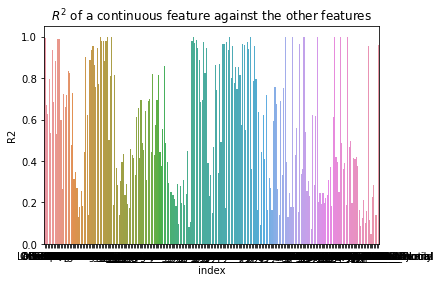

In [196]:
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

# Ridge

In [78]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [79]:
ridge = Ridge()
ridge.fit(X_train, y_train)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=X_train.columns)

the ridge intercept is: -890791.85


GrLivArea                    39.278437
LotFrontage                   8.806922
LotArea                       0.628342
OverallQual                7613.213435
OverallCond                6205.696264
                              ...     
SaleCondition__Abnorml    -2942.923744
SaleCondition__AdjLand    -1893.892663
SaleCondition__Alloca      7284.040643
SaleCondition__Family     -7229.292882
SaleCondition__Partial    11886.475556
Length: 230, dtype: float64

In [80]:
ridge.score(X_train, y_train)

0.9358258284094734

In [84]:
alphas

array([ 0.1       ,  1.15263158,  2.20526316,  3.25789474,  4.31052632,
        5.36315789,  6.41578947,  7.46842105,  8.52105263,  9.57368421,
       10.62631579, 11.67894737, 12.73157895, 13.78421053, 14.83684211,
       15.88947368, 16.94210526, 17.99473684, 19.04736842, 20.1       ])

In [81]:
alphas = np.arange(0,20)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
coefs = pd.DataFrame(coefs, index = alphas, columns = X_train.columns)  
coefs.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,36.994191,6.224540,0.662274,7148.910271,6157.342798,431.286780,28.980482,14.067854,-1470.679401,21.709716,...,5881.508989,-8069.103846,-11164.683267,-11759.942976,-5013.410694,-2545.491679,-3425.435816,10708.880601,-6752.067561,16550.530122
1,14.752277,107.047296,0.452911,5337.607680,1715.372297,97.854348,26.102498,2.634250,3407.533067,17.359829,...,1692.146087,-6459.089798,6843.571469,-8672.940860,-6570.063639,-2654.532324,-7128.207728,4579.185419,-7235.987395,7674.260913
2,12.045920,106.518223,0.389442,4456.450648,939.668565,86.222929,22.621826,2.263215,3844.769134,14.248545,...,1395.948709,-5477.213714,7240.646245,-7100.048870,-5565.921593,-2332.245636,-5769.973197,2164.430543,-5363.592462,7546.059455
3,10.498955,100.475481,0.346923,3915.860402,574.624032,80.449092,20.141489,2.094429,3904.462204,12.405586,...,1209.612148,-4918.131183,7065.557517,-6210.809801,-4802.297437,-2130.264853,-4740.350822,1076.750424,-4299.182638,7192.133021
4,9.403364,93.946614,0.314315,3525.614311,364.344234,76.084724,18.232679,1.967131,3853.355523,11.091789,...,1072.575935,-4527.059781,6755.666479,-5598.083010,-4230.829851,-1976.532086,-4034.472350,497.043974,-3606.184300,6797.712079


In [85]:
coefs.shape

(20, 230)

# Lasso

In [95]:
lasso  = Lasso()
alphas = np.linspace(0.1,20.1,20)
lasso.set_params(max_iter = 10000, normalize=False)
coefs_lasso  = []
train_scores_lasso = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs_lasso.append(lasso.coef_)
        train_scores_lasso.append(lasso.score(X_train, y_train))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0.100000,36.250906,6.103180,0.655457,7134.823878,6142.490813,434.228355,28.762452,14.192338,-1634.636573,22.485109,...,5799.597006,-7498.380207,-10719.050291,-12121.256295,-4993.908649,-2819.117940,-2562.166069,9782.386221,-6902.276360,16193.932907
1.152632,36.273982,7.527170,0.652678,7169.102330,6159.360623,438.251688,28.812368,14.145865,-1661.900832,22.544373,...,5446.476591,-6860.336853,-9144.768937,-11586.116967,-2646.484531,-2857.197362,-1470.840668,8880.697078,-6849.472141,14753.123306
2.205263,36.389696,8.737429,0.649153,7203.290847,6177.900528,441.887449,28.851717,14.111900,-1621.506410,22.528691,...,5100.800910,-6147.759956,-7544.386734,-11065.381263,-327.123004,-2877.680504,-319.717371,7991.053536,-6797.757215,13287.630440
3.257895,36.522113,9.878700,0.645790,7238.271120,6185.902502,444.566065,28.891503,14.073558,-1548.031594,22.472433,...,4677.986494,-5460.740176,-5978.580323,-10536.929816,-0.000000,-2843.002199,-0.000000,7102.205289,-6761.229543,11846.805772
4.310526,36.593988,10.883193,0.641928,7268.287826,6196.036747,446.218492,28.963733,14.040915,-1474.196407,22.477158,...,4234.234924,-4774.276659,-4437.820164,-9946.190213,-0.000000,-2828.131787,-0.000000,6228.139812,-6713.771044,10431.444493
5.363158,36.626450,11.782113,0.638823,7294.386593,6204.583759,447.439648,29.042466,14.041489,-1405.425880,22.512998,...,3805.891424,-4104.112513,-2910.316989,-9330.255925,-0.000000,-2813.127604,-0.000000,5395.282756,-6675.280599,9039.047680
6.415789,36.564015,12.225853,0.638042,7316.487489,6205.909481,448.243526,29.099343,14.047943,-1363.570155,22.625525,...,3341.220678,-3480.955454,-1429.510821,-8731.107813,-0.000000,-2808.607464,-0.000000,4583.665012,-6608.612578,7698.969730
7.468421,36.383049,12.721062,0.636841,7337.799337,6206.095313,448.894454,29.149046,14.052950,-1328.783835,22.855986,...,2882.656400,-2883.171024,-0.000000,-8116.907472,-0.000000,-2814.254806,-0.000000,3765.445047,-6529.734252,6412.222303
8.521053,36.159006,13.129476,0.634341,7359.665642,6210.543232,448.069370,29.196037,14.078425,-1294.325297,23.120161,...,2405.993538,-2294.797944,-0.000000,-7502.659296,-0.000000,-2824.655908,-0.000000,2939.410387,-6420.418944,6485.178574
9.573684,35.921603,13.511872,0.632292,7383.331731,6215.725237,446.636810,29.254898,14.135259,-1268.713903,23.354671,...,1932.291024,-1701.811967,-0.000000,-6893.976229,-0.000000,-2823.534581,-0.000000,2037.326946,-6309.238086,6555.529543


In [96]:
train_scores_lasso

[0.9371204819157849,
 0.9370896178053957,
 0.9370191640976324,
 0.9369201257095502,
 0.9367940258695461,
 0.9366386255621855,
 0.9364921028163544,
 0.9363388294894258,
 0.9361888718144538,
 0.9360367134305307,
 0.9358779497916161,
 0.9357088792759322,
 0.9355664436786858,
 0.9354293804381167,
 0.9352873230415064,
 0.9351394885886051,
 0.9349825085125538,
 0.9348156521734561,
 0.934639226521247,
 0.9344519205078449]

In [190]:
lasso.score(X_train, y_train)

0.9344514620866928

In [135]:
lasso  = Lasso()
alphas = np.linspace(0.1,20.1,20)
lasso.set_params(max_iter = 10000, normalize=False)
coefs_lasso  = []
test_scores_lasso = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_test, y_test)  
        coefs_lasso.append(lasso.coef_)
        test_scores_lasso.append(lasso.score(X_test, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_test.columns)  
coefs_lasso

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0.100000,52.532159,-175.588274,0.962981,7805.512678,6355.768960,464.573133,15.202491,24.769414,4612.411986,-10.505309,...,-9641.794723,9161.822532,23825.756902,0.0,0.0,-22280.739444,0.0,6759.573131,-37987.067026,0.016070
1.152632,52.071841,-176.219372,0.953243,7852.655061,6279.034527,469.493156,15.064409,24.820425,4003.731057,-10.199740,...,-8879.656953,9039.234889,23854.944769,0.0,0.0,-22373.113639,0.0,5853.994354,-37547.496297,2.137326
2.205263,51.544854,-176.096196,0.947259,7882.231368,6209.636956,473.859754,15.020847,24.849475,3619.838407,-9.681321,...,-8178.219533,8895.871459,23803.412627,0.0,0.0,-22468.858573,0.0,4657.090994,-37085.013541,1.763180
3.257895,51.102987,-175.371850,0.940748,7911.429296,6144.258536,479.215481,14.988425,24.868724,3314.778868,-9.233200,...,-7481.034482,8737.908401,23766.252316,0.0,0.0,-22537.561526,0.0,3580.717344,-36613.302942,1.785160
4.310526,50.046715,-173.451201,0.933062,7892.157832,6093.099646,477.006379,15.052973,24.744138,3301.694092,-7.950271,...,-6878.211820,8508.246151,23745.655758,0.0,0.0,-22516.802858,0.0,3197.101137,-36237.636017,4.073343
5.363158,48.948949,-171.691907,0.926533,7878.799553,6036.615346,474.550675,15.112021,24.752995,3252.538481,-6.811439,...,-6278.487055,8224.586396,23729.892693,0.0,0.0,-22449.762332,0.0,2488.343733,-35830.155444,3.223006
6.415789,48.239463,-170.477491,0.920143,7876.932471,5986.266539,471.805211,15.140034,24.790514,3207.058849,-6.103201,...,-5639.725733,7927.905091,23725.750591,0.0,0.0,-22383.724808,0.0,1129.967891,-35471.639187,0.329950
7.468421,47.432626,-169.223261,0.913999,7888.421227,5934.683934,468.443743,15.172705,24.791343,3139.775049,-5.332887,...,-4956.914278,7604.422259,23772.569519,0.0,0.0,-22299.917947,0.0,0.000000,-35186.351387,0.000000
8.521053,46.515518,-167.186388,0.906364,7896.655082,5894.864742,464.736690,15.243973,24.794283,3179.044717,-4.429029,...,-4312.361553,7337.743294,23849.876970,0.0,0.0,-22199.681320,0.0,0.000000,-34885.704866,0.000000
9.573684,45.452172,-165.357158,0.898894,7908.652549,5860.350372,461.593118,15.296623,24.726517,3214.110357,-3.350922,...,-3675.723677,7196.396824,23943.470578,0.0,0.0,-22125.062928,0.0,0.000000,-34556.476784,0.000000


In [165]:
coefs_lasso.iloc[3,:] == 0

GrLivArea                 False
LotFrontage               False
LotArea                   False
OverallQual               False
OverallCond               False
                          ...  
SaleCondition__Abnorml    False
SaleCondition__AdjLand     True
SaleCondition__Alloca     False
SaleCondition__Family     False
SaleCondition__Partial    False
Name: 3.2578947368421054, Length: 230, dtype: bool

In [166]:
to_drop = coefs_lasso.columns[(coefs_lasso == 0).all()]

In [167]:
to_drop

Index(['Condition1__RRNe', 'Condition2__PosN', 'Condition2__RRAe',
       'Condition2__RRAn', 'HouseStyle__2.5Fin', 'RoofStyle__Shed',
       'Exterior1st__AsphShn', 'Exterior1st__ImStucc', 'Exterior1st__PreCast',
       'Exterior2nd__CBlock', 'Exterior2nd__ImStucc', 'Exterior2nd__PreCast',
       'ExterCond__Po', 'BsmtQual__Po', 'BsmtCond__Ex', 'Electrical__NA',
       'Functional__Sal', 'GarageQual__Po', 'SaleType__CWD', 'SaleType__Con',
       'SaleType__Oth', 'SaleType__VWD', 'SaleCondition__AdjLand'],
      dtype='object')

In [149]:
best_alpha = coefs_lasso.iloc[3,:] == 0

In [156]:
best_alpha = best_alpha.astype(int)

In [163]:
best_alpha

GrLivArea                 0
LotFrontage               0
LotArea                   0
OverallQual               0
OverallCond               0
                         ..
SaleCondition__Abnorml    0
SaleCondition__AdjLand    1
SaleCondition__Alloca     0
SaleCondition__Family     0
SaleCondition__Partial    0
Name: 3.2578947368421054, Length: 230, dtype: int64

In [98]:
test_scores_lasso

[0.9559601027215396,
 0.9559178631725298,
 0.9558188736366201,
 0.9556674685608234,
 0.9555264827179651,
 0.9553922826481043,
 0.9552538730101223,
 0.9550984527909103,
 0.9549456647279586,
 0.954765292994631,
 0.9545652125269589,
 0.954339688189279,
 0.9541137769496583,
 0.9538861859111856,
 0.9536730458391224,
 0.9534652502378013,
 0.9532637919058675,
 0.9530582866780535,
 0.9528572549902756,
 0.9526511416304645]

In [88]:
print("R^2 for train set: %f" %lasso.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %lasso.score(X_test, y_test))

R^2 for train set: 0.934452
--------------------------------------------------
R^2 for test  set: 0.922391


# Elastic Net

In [191]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
elasticnet.fit(X_train, y_train)
print(r'The R^2 is %.2f' %(elasticnet.score(X_train, y_train)))
elasticnet.coef_,  elasticnet.intercept_

The R^2 is 0.91


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589115383210.1572, tolerance: 1154369640.498672
  model = cd_fast.enet_coordinate_descent(


(array([ 4.03539781e+01,  1.22257466e+02,  5.79299661e-01,  1.14370567e+04,
         6.52057718e+03,  5.09778616e+02,  3.96465526e+01,  1.75731398e+01,
        -1.32553747e+03,  2.11164639e+01,  2.22977565e+01,  1.49645726e+03,
        -9.23578382e+02, -1.01195487e+03,  2.75165278e+02, -5.75974088e+03,
        -5.26272770e+03, -1.76396154e+02,  2.59521245e+03,  6.60300200e+03,
         1.55069808e+01, -1.20739494e+01,  1.90958098e+01,  6.94608350e-01,
         3.52872902e+01, -9.59491898e+02, -3.27914575e+02,  1.54898647e+03,
         3.50657135e+01,  3.24435371e+03, -3.42243795e+01,  3.52633327e+02,
         1.90803728e+02,  3.99930760e+02,  2.06777838e+03,  1.39033866e+03,
        -1.26145991e+03,  7.11570347e+02, -4.46468837e+03, -3.17432122e+03,
        -4.81952298e+03,  2.88052910e+02, -1.17985385e+03,  0.00000000e+00,
        -8.57076657e+02,  9.04468206e+02,  0.00000000e+00, -8.13673912e+02,
        -5.01473699e+03,  1.13599355e+02,  2.36892523e+03, -1.11331616e+03,
        -3.9

In [110]:
np.linspace(0.01, 1, 100)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [112]:
ridge.set_params(normalize=True)
lasso.set_params(normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.1,20.1,20)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [109]:
alphas[ridge_underfit]

array([], dtype=float64)

Text(0, 0.5, '$R^2$')

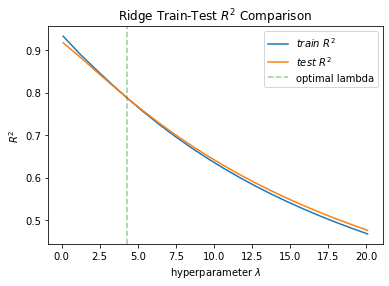

In [114]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.min(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [125]:
alphas[3]

3.2578947368421054

In [124]:
lasso_scores_test[3]

0.9211416762020458

In [122]:
max(lasso_scores_test)

0.9211416762020458

Text(0, 0.5, '$R^2$')

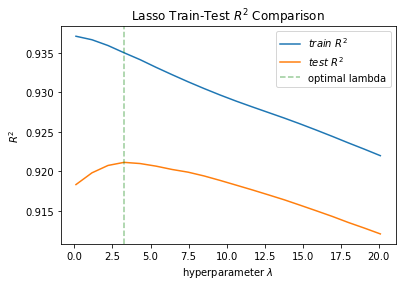

In [127]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
#last_underfit  = np.min(alphas[lasso_underfit])
plt.axvline(3.2578947368421054, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [119]:
last_underfit

4.310526315789473

In [197]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()

In [198]:
randomForest.fit(X_train, y_train) 

RandomForestRegressor()

In [199]:
print("The training error is: %.5f" % (1-randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1-randomForest.score(X_test, y_test)))

The training error is: 0.01488
The test     error is: 0.10457


In [200]:
randomForest.score(X_train, y_train)

0.9851175291150038

In [201]:
randomForest.score(X_test, y_test)

0.8954254868506962

In [202]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [203]:
import sklearn.model_selection as ms
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)

In [206]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [207]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [208]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [210]:
rf_random.score(X_train, y_train)

0.9999999867118432

In [211]:
rf_random.score(X_test, y_test)

0.8951179114974555

In [213]:
predictions = rf_random.predict(X_test)

In [221]:
predictions=predictions.reshape(512,1)

In [222]:
predictions - X_test

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,186221.8575,187622.857500,175610.8575,187693.8575,187693.8575,185719.8575,187394.8575,187296.8575,187699.8575,186975.8575,...,187700.8575,187700.8575,187700.8575,187700.8575,187700.8575,187700.8575,187700.8575,187700.8575,187700.8575,187700.8575
1,142526.5950,143507.595000,133572.5950,143574.5950,143572.5950,141620.5950,143525.5950,143332.5950,143578.5950,142526.5950,...,143579.5950,143579.5950,143579.5950,143579.5950,143579.5950,143579.5950,143579.5950,143579.5950,143579.5950,143579.5950
2,137589.0425,139088.042500,129677.0425,139161.0425,139160.0425,137226.0425,139167.0425,138929.0425,139166.0425,138209.0425,...,139167.0425,139167.0425,139167.0425,139167.0425,139167.0425,139167.0425,139167.0425,139167.0425,139167.0425,139167.0425
3,133054.6325,134814.632500,124113.6325,134882.6325,134883.6325,132919.6325,134814.6325,133758.6325,134886.6325,133054.6325,...,134886.6325,134886.6325,134886.6325,134886.6325,134886.6325,134886.6325,134886.6325,134886.6325,134886.6325,134886.6325
4,131729.6200,132659.620000,122523.6200,132723.6200,132723.6200,130766.6200,132728.6200,132587.6200,132727.6200,131729.6200,...,132728.6200,132728.6200,132728.6200,132728.6200,132728.6200,132728.6200,132728.6200,132728.6200,132728.6200,132728.6200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,154144.4275,155580.427500,148623.4275,155616.4275,155615.4275,153697.4275,155623.4275,155423.4275,155622.4275,154880.4275,...,155623.4275,155623.4275,155623.4275,155623.4275,155623.4275,155623.4275,155623.4275,155623.4275,155623.4275,155623.4275
508,175543.7375,177134.380357,163858.7375,177206.7375,177207.7375,175242.7375,177213.7375,176971.7375,177212.7375,176368.7375,...,177213.7375,177213.7375,177213.7375,177213.7375,177213.7375,177213.7375,177213.7375,177213.7375,177213.7375,177213.7375
509,105840.4650,106765.665000,97838.4650,106834.4650,106831.4650,104893.4650,106838.4650,106838.4650,106838.4650,105840.4650,...,106838.4650,106838.4650,106838.4650,106838.4650,106838.4650,106838.4650,106838.4650,106838.4650,106838.4650,106838.4650
510,153159.3225,154469.522500,141258.3225,154537.3225,154537.3225,152588.3225,154542.3225,154223.3225,154541.3225,153159.3225,...,154542.3225,154542.3225,154542.3225,154542.3225,154542.3225,154542.3225,154542.3225,154542.3225,154542.3225,154542.3225


In [223]:
errors = abs(predictions - X_test)

In [228]:
100 * np.mean(errors/y_test)

1stFlrSF           NaN
2ndFlrSF           NaN
3SsnPorch          NaN
BedroomAbvGr       NaN
BldgType__2fmCon   NaN
                    ..
YearBuilt          NaN
YrSold__2006       NaN
YrSold__2008       NaN
YrSold__2009       NaN
YrSold__2010       NaN
Length: 231, dtype: float64

In [237]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    predictions=predictions.reshape(512,1)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(np.mean(errors))
    print(accuracy)
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(100 * (random_accuracy - base_accuracy) / base_accuracy)

Model Performance
SalePrice    16923.571484
dtype: float64
SalePrice    89.703699
dtype: float64
Model Performance
SalePrice    14699.902964
dtype: float64
SalePrice    91.025457
dtype: float64
SalePrice    1.473472
dtype: float64


In [238]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [240]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.4min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [241]:
best_grid = grid_search.best_estimator_

In [242]:
best_grid

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [243]:
best_grid.score(X_test, y_test)

0.71857503781003

In [245]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [246]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [247]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[10:22:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [248]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 73331.830699


In [250]:
xg_reg.score(X_train, y_train)

0.05434344453992079

In [251]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [252]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[10:23:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:23:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [253]:
print((cv_results["test-rmse-mean"]).tail(1))


49    24793.795987
Name: test-rmse-mean, dtype: float64


In [255]:
xgmodel = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [256]:
xgmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [266]:
xgmodel.score(X_test,y_test)

0.9200137236256113

In [261]:
from sklearn.model_selection import cross_val_score

In [262]:
scores = cross_val_score(xgmodel, X_test, y_test, scoring='neg_mean_squared_error')

In [263]:
(-scores)**0.5 

array([23604.55103   , 22011.94628582, 33820.61462328, 28524.95418712,
       27281.93572807])

In [264]:
scores.mean()

-748702322.1123011

In [267]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# xgb_grid = GridSearchCV(xgmodel,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X_train, y_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [269]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [270]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [271]:
# R^2 of the fit
gbm.score(X_train,y_train)

0.9662875493767565

In [272]:
# R^2 of the fit
gbm.score(X_test,y_test)

0.916298895339436

In [278]:
def tune_gbm(learning_rate, max_depth):
    gbm = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, max_depth=max_depth)
    gbm.fit(X_train,y_train)
    
    return gbm


def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(X_train)
    gen_test  = model.staged_predict(X_test)

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, y_train))
        testMSE.append(mean_squared_error(y_pred_test, y_test))
    
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end])
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end])

In [279]:
learning_rate=0.001
max_depth=4

model1 = tune_gbm(learning_rate, max_depth)

The best test score is 490242483.27 at the step 10000
--------------------------------------------------


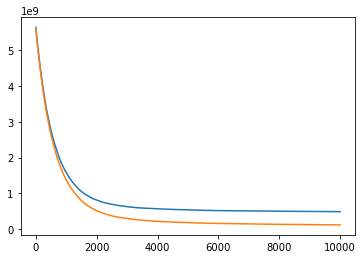

In [280]:
start = 0
end = 10000 # You may change start and end to zoom in

demo_gbm_tuning(model1, start, end)

In [281]:
learning_rate=0.05
max_depth=4

model2 = tune_gbm(learning_rate, max_depth)

The best test score is 463990539.77 at the step 574
--------------------------------------------------


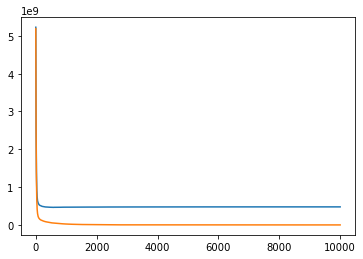

In [282]:
start = 0
end = 10000
# You may change start and end to zoom in

demo_gbm_tuning(model2, start, end)

The best test score is 466625407.02 at the step 557
--------------------------------------------------


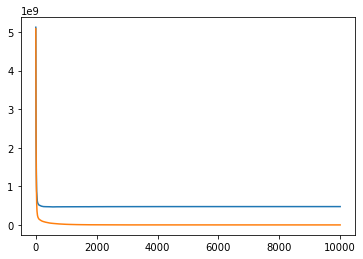

In [283]:
learning_rate=0.062
max_depth=4

model3 = tune_gbm(learning_rate, max_depth)

start = 0
end = 10000
# You may change start and end to zoom in

demo_gbm_tuning(model3, start, end)

In [287]:
sorted_importance = sorted(zip(X_train.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.49830185989441067),
 ('GrLivArea', 0.1754883942185233),
 ('1stFlrSF', 0.057348516862068884),
 ('BsmtfinSF', 0.047173650497609305),
 ('GarageCars', 0.04015699669509225),
 ('YearBuilt', 0.0378492034574523),
 ('LotArea', 0.023594956126069485),
 ('BsmtQual__Ex', 0.01704016521759523),
 ('FullBath', 0.01138926282484577),
 ('Fireplaces', 0.010568798521740235),
 ('2ndFlrSF', 0.01026361974260118),
 ('KitchenQual__Ex', 0.009066965479134341),
 ('OverallCond', 0.008536475228221017),
 ('MasVnrArea', 0.007798169491313371),
 ('KitchenQual__Gd', 0.004596607199235915),
 ('CentralAir', 0.0041696538522178524),
 ('MSZoning__RM', 0.003224749892312196),
 ('LotFrontage', 0.002965351285475929),
 ('MSSubClass__60', 0.0027593472161743463),
 ('OpenPorchSF', 0.0027061231483080546),
 ('BsmtExposure__Gd', 0.0025247873697539685),
 ('Exterior2nd__HdBoard', 0.0020395782859125543),
 ('ExterQual__Ex', 0.001950157826892389),
 ('Neighborhood__Crawfor', 0.0018337285262490456),
 ('BsmtFullBath', 0.0018274

In [289]:
from copy import deepcopy

gbm_models   = []
warm_start   = False
steps        = list(range(1,501,50))

for n_estimators in steps:
    gbm.set_params(n_estimators=n_estimators, learning_rate=0.1, warm_start=warm_start)
    gbm_models.append(deepcopy(gbm.fit(X_train, y_train))) 
    warm_start = True

In [291]:
model_importance = pd.DataFrame([model.feature_importances_ for model in gbm_models], index=steps, columns=X_train.columns)
model_importance

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,...,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
1,0.238497,0.000000,0.000000,0.664467,0.000000,0.000000,0.000000,0.000000,0.000000,0.059770,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
51,0.176091,0.001580,0.023103,0.505860,0.007675,0.037199,0.007301,0.000164,0.004112,0.057426,...,0.000000,0.000000,0.000169,0.000000,0.0,0.000042,0.0,0.0,0.000000,0.000422
101,0.174282,0.001715,0.023818,0.498190,0.008559,0.037934,0.007798,0.000697,0.004156,0.057007,...,0.000000,0.000000,0.000166,0.000342,0.0,0.000066,0.0,0.0,0.000000,0.000681
151,0.173513,0.001782,0.023865,0.495371,0.008614,0.037991,0.007983,0.000967,0.004129,0.056871,...,0.000000,0.000000,0.000165,0.000382,0.0,0.000083,0.0,0.0,0.000032,0.000714
201,0.172897,0.001884,0.023937,0.493360,0.008692,0.038043,0.008036,0.001082,0.004111,0.056842,...,0.000000,0.000000,0.000164,0.000402,0.0,0.000083,0.0,0.0,0.000052,0.000711
251,0.172532,0.001925,0.023929,0.492028,0.008721,0.038155,0.008094,0.001280,0.004104,0.056777,...,0.000007,0.000000,0.000164,0.000428,0.0,0.000118,0.0,0.0,0.000052,0.000709
301,0.172209,0.002016,0.024033,0.490837,0.008733,0.038139,0.008177,0.001458,0.004122,0.056693,...,0.000017,0.000000,0.000163,0.000482,0.0,0.000146,0.0,0.0,0.000064,0.000707
351,0.171940,0.002094,0.024086,0.489828,0.008742,0.038119,0.008182,0.001657,0.004130,0.056746,...,0.000025,0.000000,0.000163,0.000498,0.0,0.000146,0.0,0.0,0.000077,0.000705
401,0.171748,0.002138,0.024189,0.489019,0.008738,0.038137,0.008281,0.001742,0.004130,0.056684,...,0.000025,0.000000,0.000163,0.000512,0.0,0.000159,0.0,0.0,0.000093,0.000715
451,0.171570,0.002171,0.024285,0.488348,0.008776,0.038164,0.008282,0.001822,0.004128,0.056713,...,0.000025,0.000002,0.000168,0.000521,0.0,0.000165,0.0,0.0,0.000093,0.000714


Text(0, 0.5, 'feature importance')

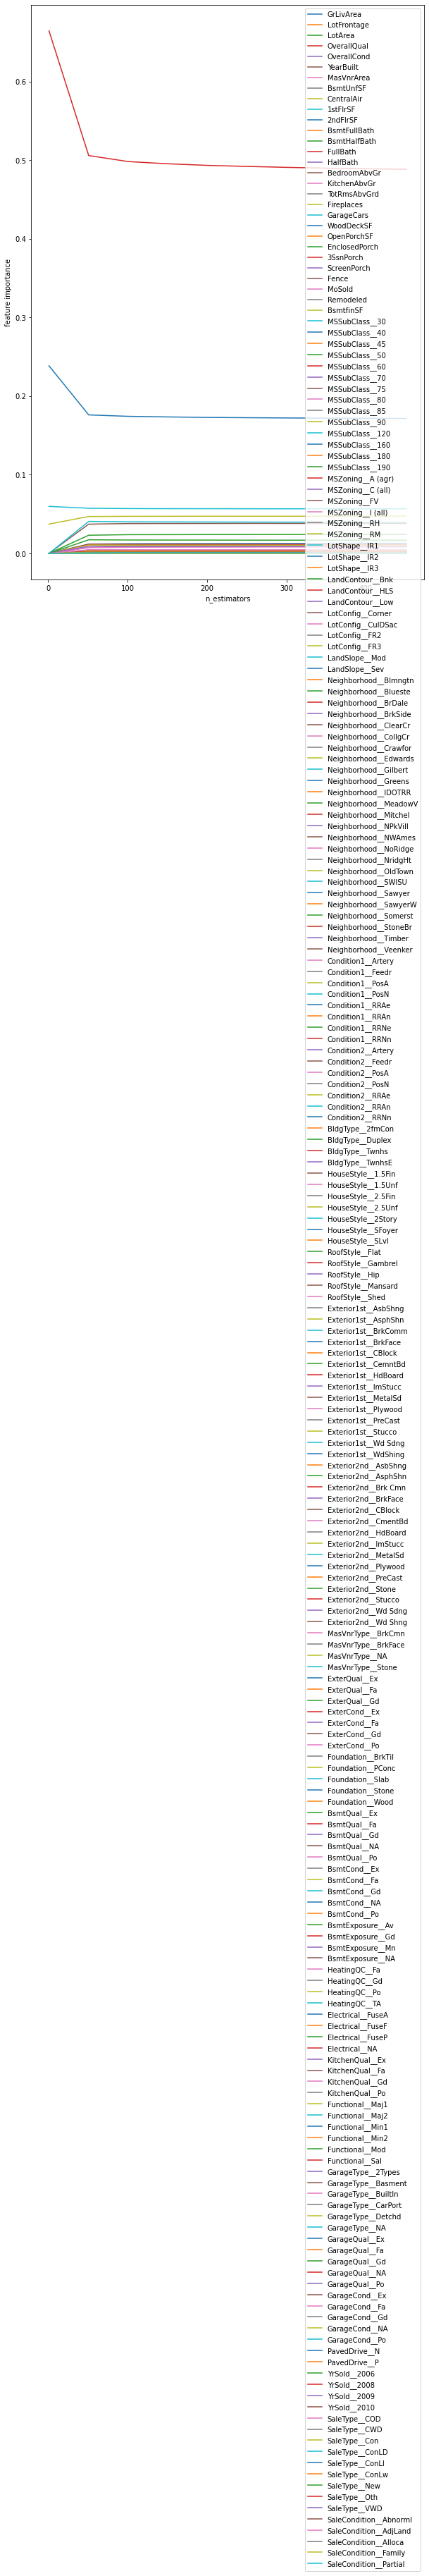

In [292]:
plt.rcParams['figure.figsize'] = (10,15)
for feature in model_importance.columns:
    plt.plot(model_importance.index, model_importance[feature], label=feature)
plt.legend(loc=1)    
plt.xlabel('n_estimators')
plt.ylabel('feature importance')

In [293]:
X_train.columns

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'CentralAir', '1stFlrSF',
       ...
       'SaleType__ConLI', 'SaleType__ConLw', 'SaleType__New', 'SaleType__Oth',
       'SaleType__VWD', 'SaleCondition__Abnorml', 'SaleCondition__AdjLand',
       'SaleCondition__Alloca', 'SaleCondition__Family',
       'SaleCondition__Partial'],
      dtype='object', length=230)

In [295]:
categorical = list(X_train.columns)
for feature in categorical:
    print(X_train[feature].value_counts())
    print('')

864     30
1092    20
1040    20
894     13
1456    13
        ..
1137     1
1761     1
1135     1
1130     1
2048     1
Name: GrLivArea, Length: 1072, dtype: int64

60.0     194
70.0     105
80.0     104
50.0      84
75.0      76
        ... 
121.0      1
150.0      1
138.0      1
174.0      1
195.0      1
Name: LotFrontage, Length: 180, dtype: int64

7200     34
9600     33
6000     27
10800    20
8400     19
         ..
9487      1
7440      1
7441      1
15635     1
10240     1
Name: LotArea, Length: 1439, dtype: int64

5     607
6     542
7     404
8     223
4     154
9      64
3      25
10     17
2       9
1       1
Name: OverallQual, dtype: int64

5    1125
6     401
7     271
8     113
4      71
9      32
3      25
2       6
1       2
Name: OverallCond, dtype: int64

2005    85
2004    77
2003    74
2006    64
2007    51
        ..
2010     1
1902     1
1904     1
1913     1
1872     1
Name: YearBuilt, Length: 109, dtype: int64

0.0      1227
120.0      11
180.0       9
340.0  

0    1995
1      51
Name: BsmtCond__NA, dtype: int64

0    2044
1       2
Name: BsmtCond__Po, dtype: int64

0    1776
1     270
Name: BsmtExposure__Av, dtype: int64

0    1846
1     200
Name: BsmtExposure__Gd, dtype: int64

0    1889
1     157
Name: BsmtExposure__Mn, dtype: int64

0    1993
1      53
Name: BsmtExposure__NA, dtype: int64

0    1980
1      66
Name: HeatingQC__Fa, dtype: int64

0    1717
1     329
Name: HeatingQC__Gd, dtype: int64

0    2046
Name: HeatingQC__Po, dtype: int64

0    1426
1     620
Name: HeatingQC__TA, dtype: int64

0    1918
1     128
Name: Electrical__FuseA, dtype: int64

0    2018
1      28
Name: Electrical__FuseF, dtype: int64

0    2041
1       5
Name: Electrical__FuseP, dtype: int64

0    2045
1       1
Name: Electrical__NA, dtype: int64

0    1931
1     115
Name: KitchenQual__Ex, dtype: int64

0    2000
1      46
Name: KitchenQual__Fa, dtype: int64

0    1242
1     804
Name: KitchenQual__Gd, dtype: int64

0    2046
Name: KitchenQual__Po, dtype: int64
